In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity_percent,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,_dataobs_
0,2017-12-01 00:00:00,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,5
1,2017-12-01 00:00:00,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,7
2,2017-12-01 00:00:00,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01 00:00:00,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes,13
4,2017-12-01 00:00:00,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,18


In [4]:
train.shape

(1752, 15)

In [5]:
train.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity_percent         0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
_dataobs_                0
dtype: int64

In [6]:
train['Date']=pd.to_datetime(train.Date)

In [7]:
train.drop('_dataobs_',axis=1,inplace=True)

In [8]:
# get day, month and year from date column

train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year
train['Day'] = train['Date'].dt.day

In [9]:
train.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity_percent,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Year,Day
0,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
1,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
2,2017-12-01,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
3,2017-12-01,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes,12,2017,1
4,2017-12-01,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,12,2017,1


In [10]:
train.drop('Year',axis=1,inplace=True)
train.drop('Date',axis=1,inplace=True)

In [11]:
train.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity_percent,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,Day
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000
mean,708.692922,11.529110,13.157420,58.333333,1.777511,1451.955479,4.327169,0.599344,0.132877,0.068379,6.501142,15.707192
std,628.077045,6.802027,11.979262,20.346672,1.048883,603.724027,13.145398,0.881588,1.164599,0.423232,3.394657,8.758998
min,0.000000,0.000000,-16.400000,0.000000,0.000000,53.000000,-29.700000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,198.750000,6.000000,3.600000,43.000000,1.000000,962.000000,-4.525000,0.000000,0.000000,0.000000,4.000000,8.000000
50%,541.000000,12.000000,14.000000,57.000000,1.600000,1717.000000,5.650000,0.040000,0.000000,0.000000,7.000000,16.000000
75%,1058.500000,17.000000,22.800000,74.000000,2.400000,2000.000000,15.125000,1.042500,0.000000,0.000000,9.000000,23.000000
max,3404.000000,23.000000,39.400000,98.000000,7.300000,2000.000000,27.200000,3.450000,35.000000,8.800000,12.000000,31.000000


In [12]:
# encode Rented Bike count to two categories, 1=High Usage and 0=Low Usage - using median

train['Rented_Bike_Count']=np.where(train['Rented_Bike_Count']>=541,1,0)

In [13]:
train.head()

,Rented_Bike_Count,Hour,Temperature,Humidity_percent,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day
0,0,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1
1,0,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1
2,0,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No Holiday,Yes,12,1
3,0,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes,12,1
4,1,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,12,1


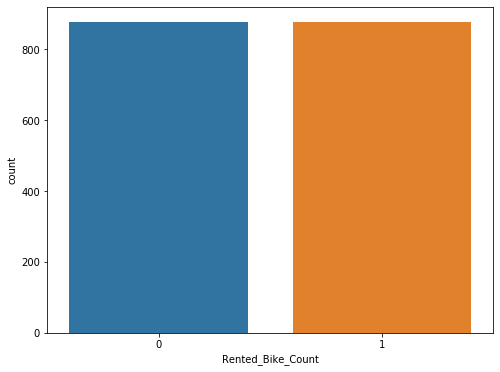

In [14]:
# count bike usage in each category
plt.figure(figsize=(8,6))
sns.countplot(x='Rented_Bike_Count',data=train)

In [26]:
# there's equal number of bike usage among the two categories

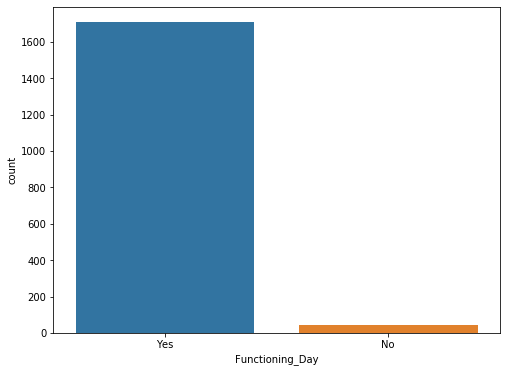

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='Functioning_Day',data=train)

In [28]:
# most bikes are rented on a Functional day

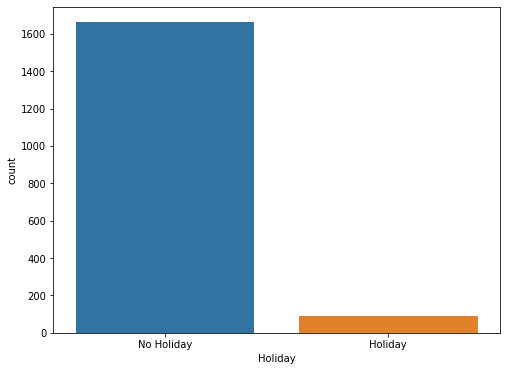

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='Holiday',data=train)

In [30]:
# most of the bikes are rented on normal days (No holiday)
# this could probably mean people mostly use them when going to work

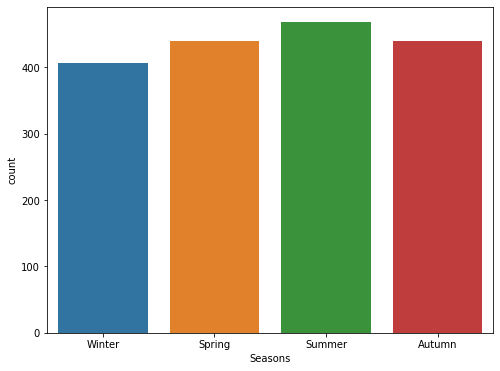

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='Seasons',data=train)

In [32]:
# most people rent bikes during summer and spring seasons

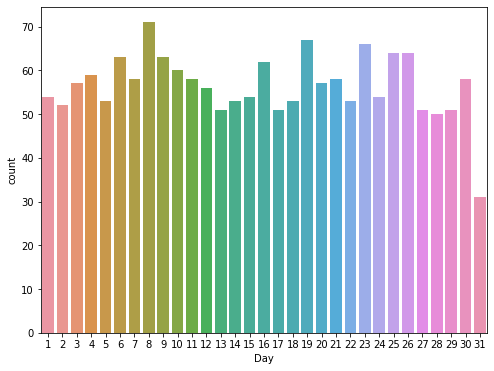

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='Day',data=train)

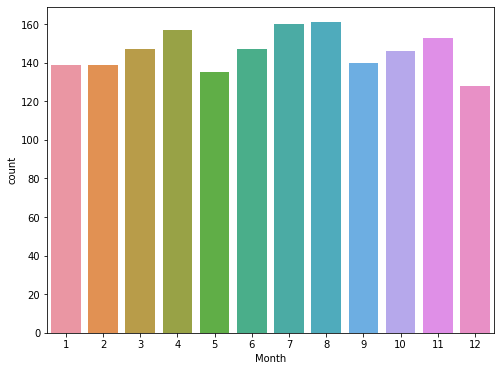

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='Month',data=train)

In [35]:
# most people rent bikes in the middle and towards the end of the year

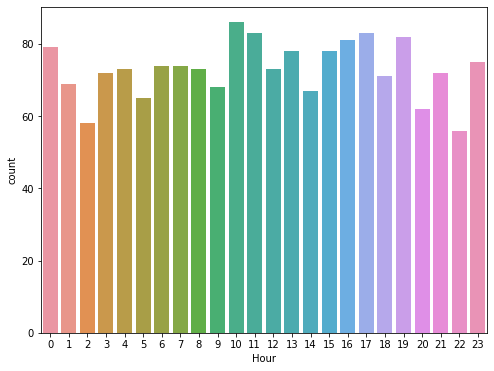

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='Hour',data=train)

In [18]:
# there's high demand of bikes between 10am and 5pm

In [19]:
train.head()

,Rented_Bike_Count,Hour,Temperature,Humidity_percent,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day
0,0,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1
1,0,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1
2,0,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No Holiday,Yes,12,1
3,0,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes,12,1
4,1,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,12,1


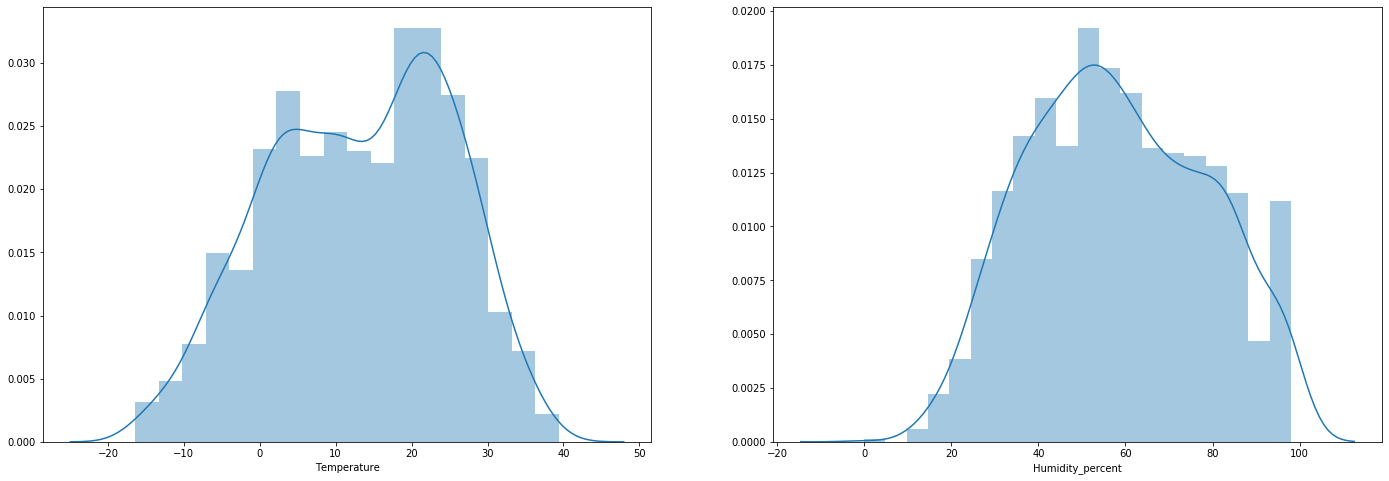

In [28]:
plt.figure(figsize=(24,8))
plt.subplot(121)
sns.distplot(train['Temperature'])
plt.subplot(122)
sns.distplot(train['Humidity_percent'])

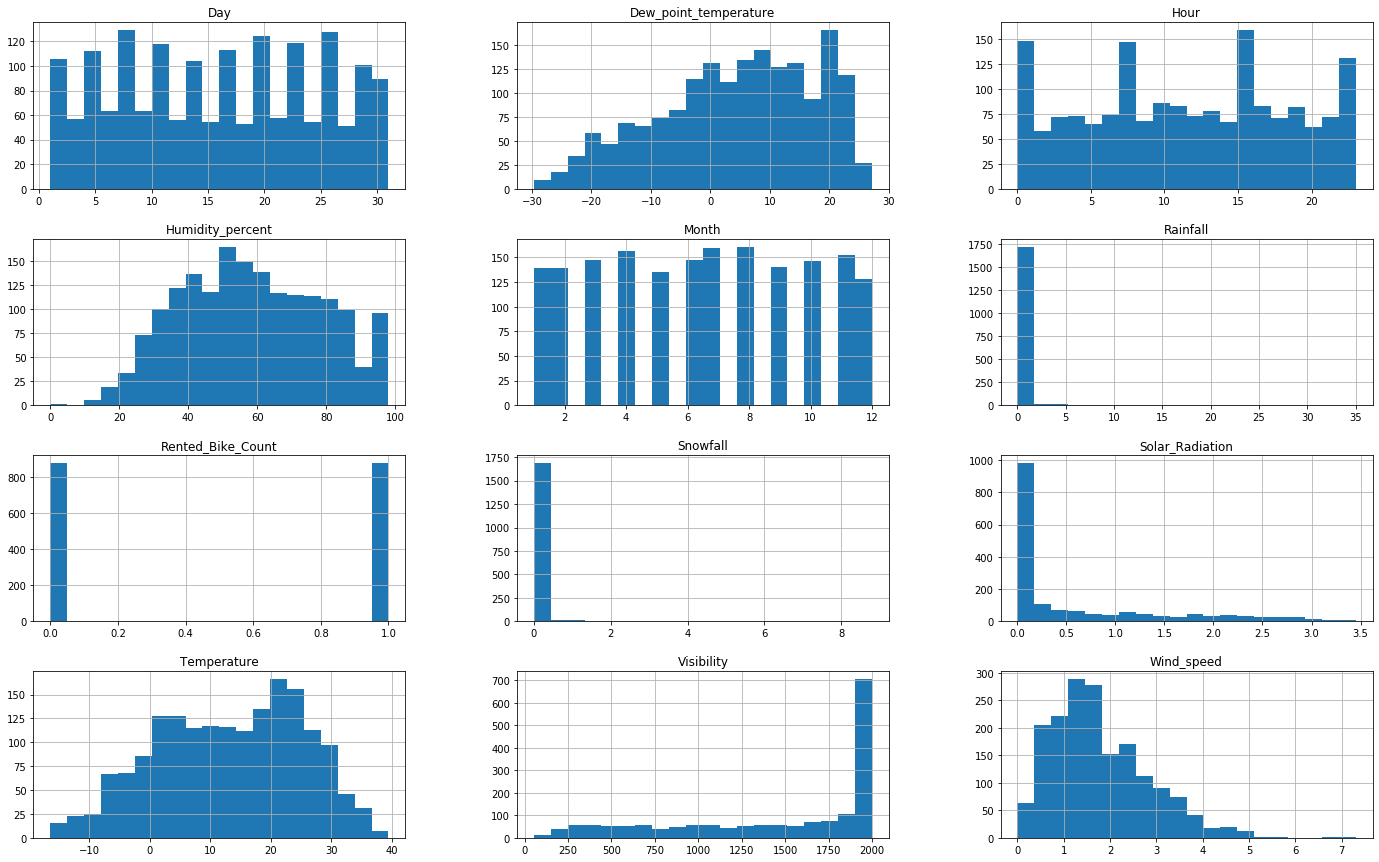

In [34]:
train.hist(bins=20,figsize=(24,15));

In [35]:
train.skew()

Rented_Bike_Count         0.000000
Hour                     -0.026516
Temperature              -0.205889
Humidity_percent          0.088003
Wind_speed                0.917772
Visibility               -0.741051
Dew_point_temperature    -0.403435
Solar_Radiation           1.408001
Rainfall                 19.769046
Snowfall                  9.695201
Month                    -0.012315
Day                       0.018865
dtype: float64

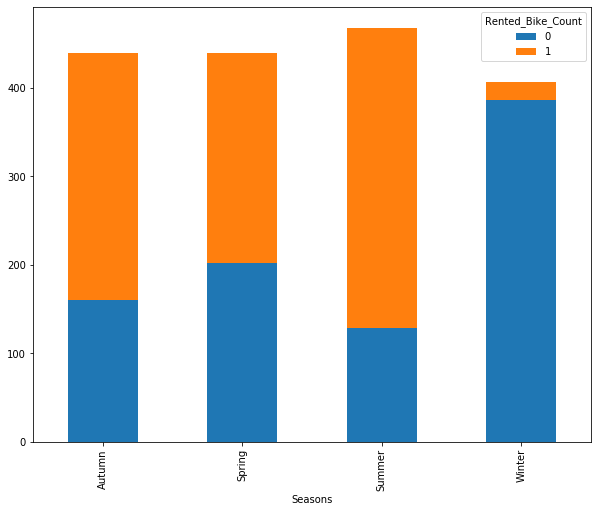

In [40]:
season_plot=pd.crosstab(train['Seasons'],train['Rented_Bike_Count'])
season_plot.plot(kind='bar',stacked=True,figsize=(10,8));

In [41]:
# There is high usage of bikes in summer
# It can be noted that there is a low usage of bikes in Winter

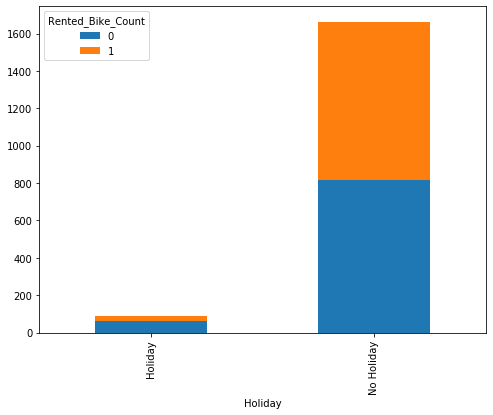

In [43]:
holiday_plot=pd.crosstab(train['Holiday'],train['Rented_Bike_Count'])
holiday_plot.plot(kind='bar',stacked=True,figsize=(8,6));

In [ ]:
# there's almost equal usage of bikes when it's not a holiday

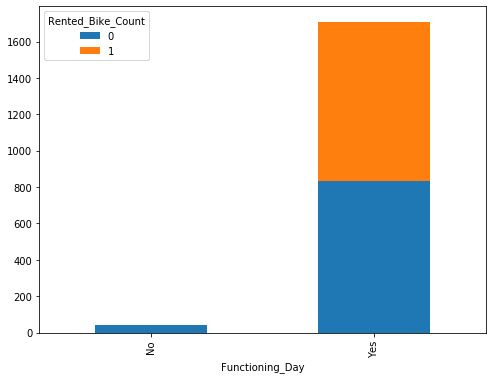

In [46]:
function_plot=pd.crosstab(train['Functioning_Day'],train['Rented_Bike_Count'])
function_plot.plot(kind='bar',stacked=True,figsize=(8,6));

In [47]:
# there's almost equal usage of bikes on a functional day

In [49]:
temp = train['Temperature'].values
category = []
for i in temp:
    if i>=-16 and i<=0:
        category.append("Very Low")
    elif i>0 and i<=15:
        category.append("Low")
    elif i>15 and i<=25:
        category.append("Moderate")
    else:
        category.append("High")

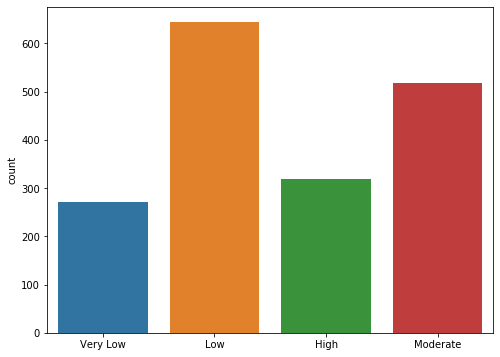

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x=category);

In [52]:
# most people rent bikes during low (between 0 and 15 degrees) and moderate (between 15 and 35 degrees) temperatures

In [53]:
category = pd.DataFrame(category,columns=['temp'])

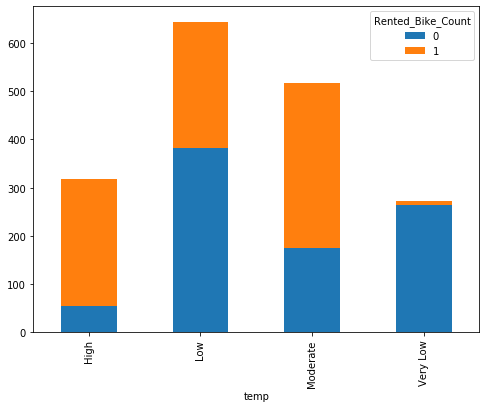

In [54]:
temp_plot=pd.crosstab(category['temp'],train['Rented_Bike_Count'])
temp_plot.plot(kind='bar',stacked=True,figsize=(8,6));

In [55]:
# There is high usage of bikes during moderate temperatures (between 15 and 25 degrees)

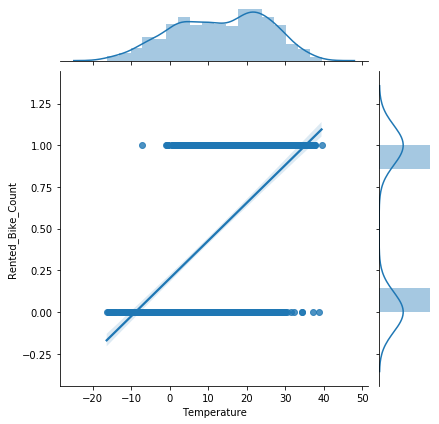

In [58]:
sns.jointplot("Temperature", "Rented_Bike_Count", data=train, kind="reg");

In [122]:
# the higher the temperatures the higher the bike usage
# as the temperature decreases bike rentals decline
# which simply means that temperature has an effect on bike rentals

In [74]:
rain = train['Rainfall'].values
rain_category = []
for i in rain:
    if i>=0 and i<=2:
        rain_category.append("Light Rainfall")
    elif i>2 and i<=5:
        rain_category.append("Moderate Rainfall")
    else:
        rain_category.append("Heavy Rainfall")

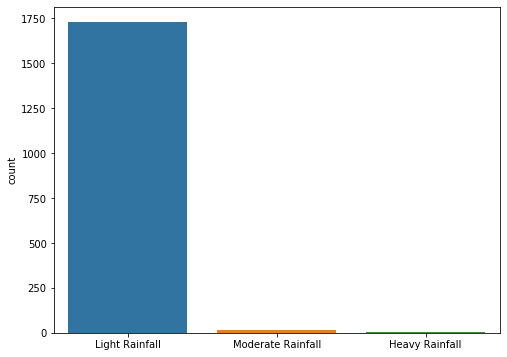

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(x=rain_category);

In [76]:
# people rent bikes on day with light rainfall (0 to 2mm)

In [77]:
rain_category = pd.DataFrame(rain_category,columns=['rain'])

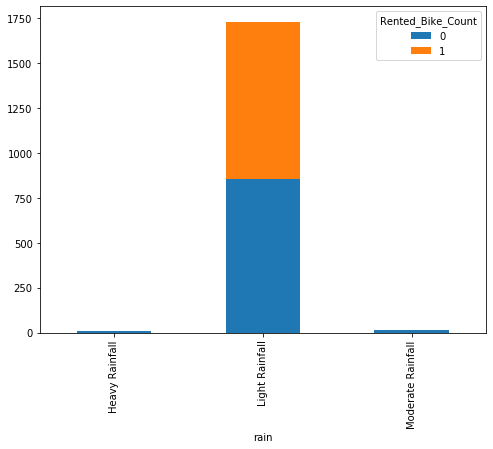

In [78]:
rain_plot=pd.crosstab(rain_category['rain'],train['Rented_Bike_Count'])
rain_plot.plot(kind='bar',stacked=True,figsize=(8,6));

In [79]:
# there's very low bike usage on rainy days or on days with moderate (2 to 5mm) and high rainfall
# High usage of bikes takes place on light rainfall days

In [81]:
snow = train['Snowfall'].values
snow_category = []
for i in snow:
    if i>=0 and i<=2:
        snow_category.append("Light Snowfall")
    else:
        snow_category.append("Heavy Snowfall")

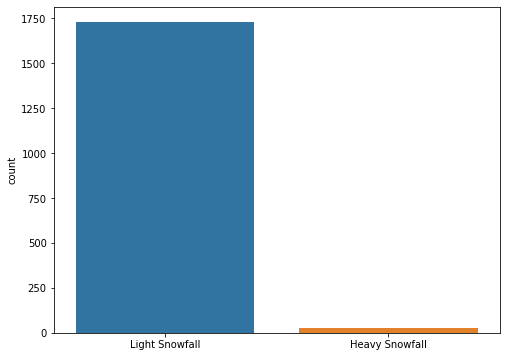

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(x=snow_category);

In [83]:
# people rent bikes on none snowfall days

In [84]:
snow_category = pd.DataFrame(snow_category,columns=['snow'])

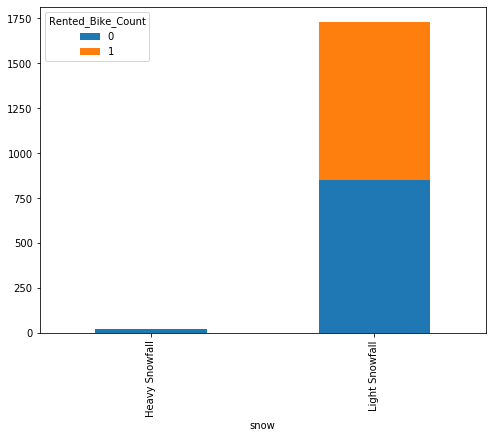

In [86]:
snow_plot=pd.crosstab(snow_category['snow'],train['Rented_Bike_Count'])
snow_plot.plot(kind='bar',stacked=True,figsize=(8,6));

In [87]:
# high bike usage on non-snowy days - normal days

In [88]:
wind= train['Wind_speed'].values
wind_category = []
for i in wind:
    if i>=0 and i<=3:
        wind_category.append("Light Air")
    else:
        wind_category.append("Light Breeze")

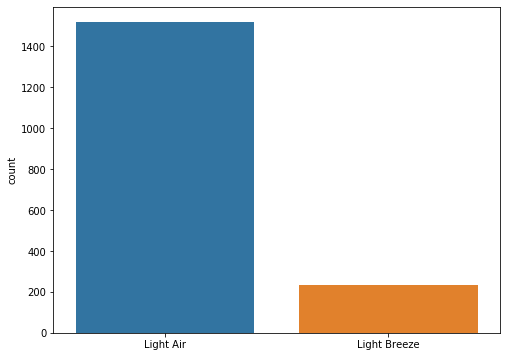

In [89]:
plt.figure(figsize=(8,6))
sns.countplot(x=wind_category);

In [90]:
# most people rent bikes on light breeze/gentle wind days

In [91]:
wind_category = pd.DataFrame(wind_category,columns=['wind'])

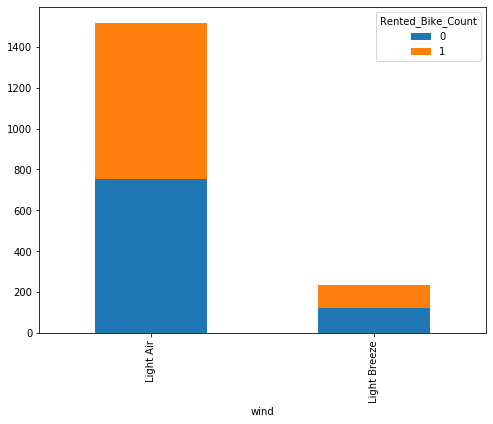

In [92]:
wind_plot=pd.crosstab(wind_category['wind'],train['Rented_Bike_Count'])
wind_plot.plot(kind='bar',stacked=True,figsize=(8,6));

In [93]:
# Very high bike usage on light breeze days (0 to 3 mph windspeed)
# we can also observe some high bike usage on Light breeze days(more than 4 mph windspeed)

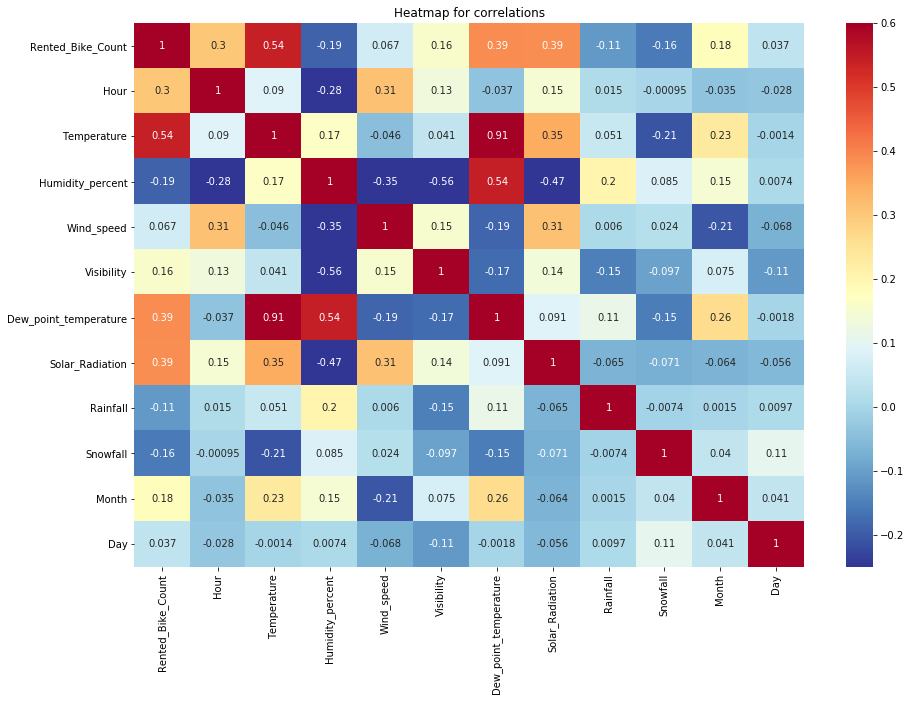

In [95]:
# check correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Heatmap for correlations');

In [96]:
# it can be noted that Temperature and Dew point temperatre are very strongly correlated.
# we will drop one of these predictor variables so that their high correlation doesn't affect model's accuracy

In [97]:
train.drop('Dew_point_temperature',axis=1,inplace=True)

In [98]:
train.head()

,Rented_Bike_Count,Hour,Temperature,Humidity_percent,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day
0,0,4,-6.0,36,2.3,2000,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1
1,0,6,-6.6,35,1.3,2000,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1
2,0,11,-0.5,21,1.3,1936,0.94,0.0,0.0,Winter,No Holiday,Yes,12,1
3,0,12,1.7,23,1.4,2000,1.11,0.0,0.0,Winter,No Holiday,Yes,12,1
4,1,17,0.8,58,1.6,2000,0.08,0.0,0.0,Winter,No Holiday,Yes,12,1


In [99]:
# ---------------------Encode Categorical variables

le = LabelEncoder()
train['Functioning_Day'] = le.fit_transform(train['Functioning_Day'])
train['Seasons'] = le.fit_transform(train['Seasons'])
train['Holiday'] = le.fit_transform(train['Holiday'])

In [100]:
train.head()

,Rented_Bike_Count,Hour,Temperature,Humidity_percent,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day
0,0,4,-6.0,36,2.3,2000,0.00,0.0,0.0,3,1,1,12,1
1,0,6,-6.6,35,1.3,2000,0.00,0.0,0.0,3,1,1,12,1
2,0,11,-0.5,21,1.3,1936,0.94,0.0,0.0,3,1,1,12,1
3,0,12,1.7,23,1.4,2000,1.11,0.0,0.0,3,1,1,12,1
4,1,17,0.8,58,1.6,2000,0.08,0.0,0.0,3,1,1,12,1


In [113]:
#------------------- Machine Learning Algorithms-------------

# Classification Algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import mean_squared_error 

In [102]:
X = train.drop('Rented_Bike_Count',axis=1)
y = train['Rented_Bike_Count']

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [104]:
# Logistic Regression

lm = LogisticRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)*100

81.74904942965779

In [105]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("accuracy:",rf.score(X_test,y_test)*100)

accuracy: 91.25475285171103


In [119]:
# The Random forest model is 91% accurate in classifying the count of bikes rented as low or high usage

In [106]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("accuracy:",dt.score(X_test,y_test)*100)

accuracy: 89.73384030418251


In [108]:
# Out of the 3 models trained, Random forest has the highest accuracy
# we select this model as the best model to predict the bike rental count 
# and the features that are good predictors of high usage day for bike rentals.

In [110]:
y_pred = rf.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       252
           1       0.92      0.91      0.92       274

    accuracy                           0.91       526
   macro avg       0.91      0.91      0.91       526
weighted avg       0.91      0.91      0.91       526



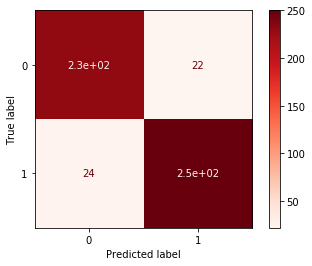

In [116]:
# confusion matrix for Random forest
plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Reds);

In [120]:
# out of 272 high usage bikes rented, the model accurately/correctly identified/predicted 250 of them as high usage, 92% 
# out of 254 low usage bikes rented, the model accurately/correctly identified/predicted 230 of them as low usage, 91%

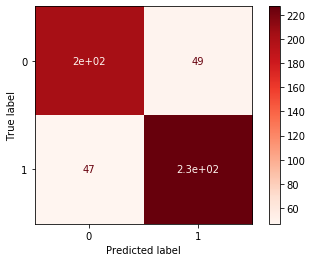

In [117]:
# confusion matrix for Logistic Regression
plot_confusion_matrix(lm,X_test,y_test,cmap=plt.cm.Reds);

In [121]:
# RMSE of a Random forest
mean_squared_error(y_test, y_pred, squared=False)

0.2957236403855629

In [124]:
# RMSE is very low, which means the model performed very well on the test set

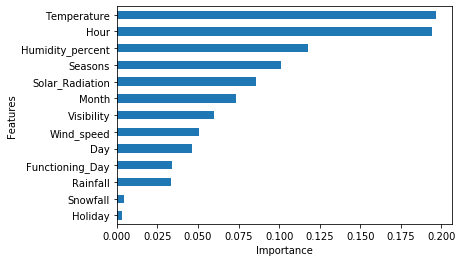

In [107]:
# feature importance
# important factors/ predictors identified by the best model

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(15).plot(kind='barh')
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [118]:
# Temperature, Hour of the day, Humidity and Season came on top 
# as the most important factors to predict high usage day of bike rentals
# These are the top 4 factors that have the most effect on bike rentals

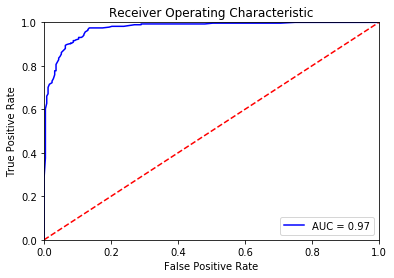

In [109]:
# ROC CURVE OF THE SELECTED MODEL (RANDOM FOREST)
probs = rf.predict_proba(X_test)  
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()